<a href="https://colab.research.google.com/github/NarendraPati1/ML/blob/main/heart_attack_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('heart.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df.drop_duplicates(keep='first',inplace=True)

**Gendar Categorizationa**

Male 206 , Female 96


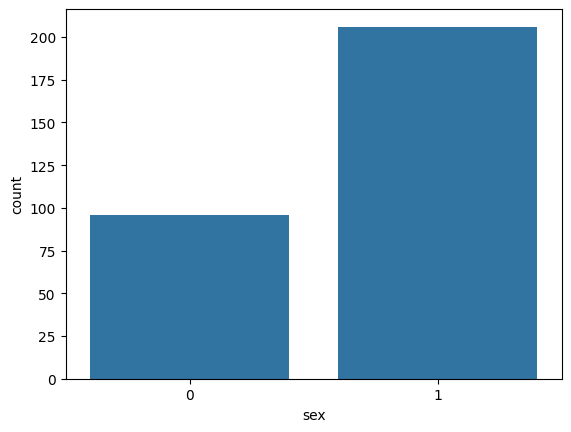

In [15]:
x= (df.sex.value_counts())
print(f'Male {x[1]} , Female {x[0]}')
p= sns.countplot(data = df , x= 'sex')
plt.show()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


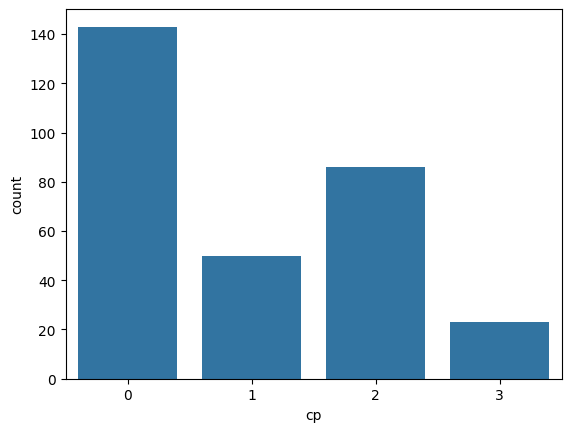

In [16]:
x= (df.cp.value_counts())
print(x)
p= sns.countplot(data = df , x= 'cp')
plt.show()

**Age Distribution**

<Figure size 1000x1000 with 0 Axes>

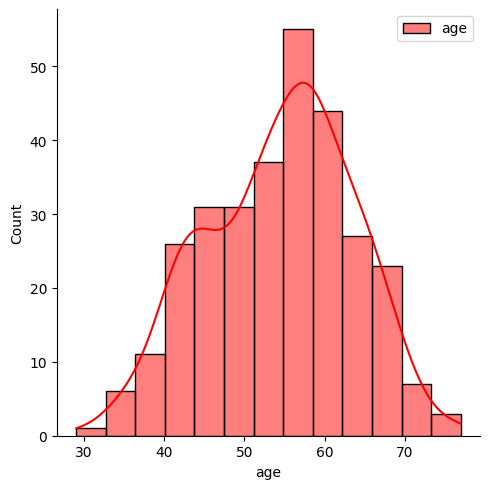

In [17]:
plt.figure(figsize=(10,10))
sns.displot(df.age,color='red', label ='age',kde= True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

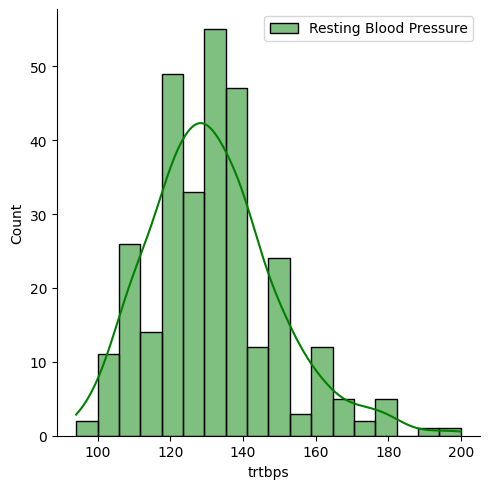

In [18]:
plt.figure(figsize=(10,10))
sns.displot(df.trtbps ,color='green', label ='Resting Blood Pressure',kde= True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

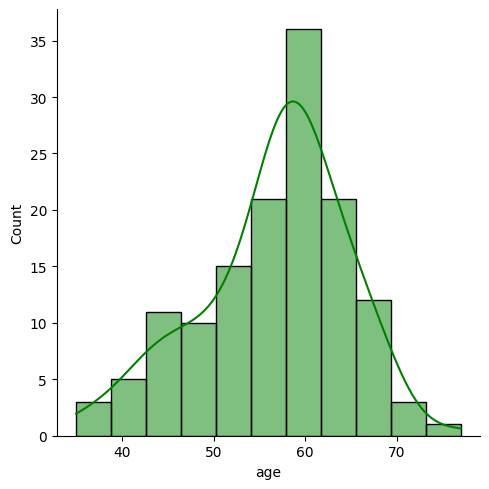

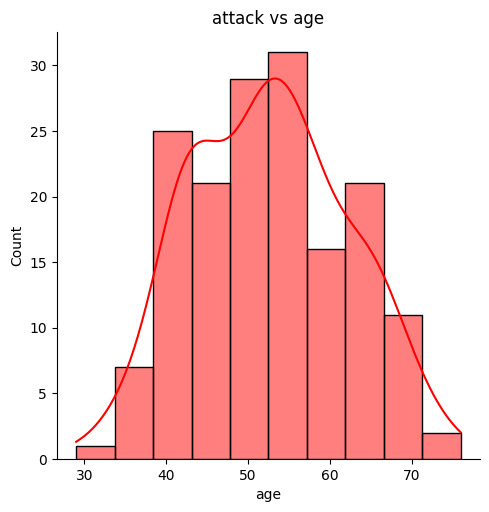

In [26]:
plt.figure(figsize=(10,10))
sns.displot(df[df['output']==0]['age'] ,color='green',kde= True)
sns.displot(df[df['output']==1]['age'] ,color='red',kde= True)
plt.title("attack vs age")
plt.show()


<Figure size 1000x1000 with 0 Axes>

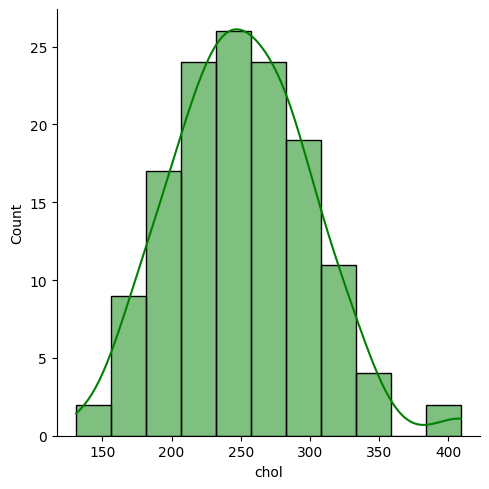

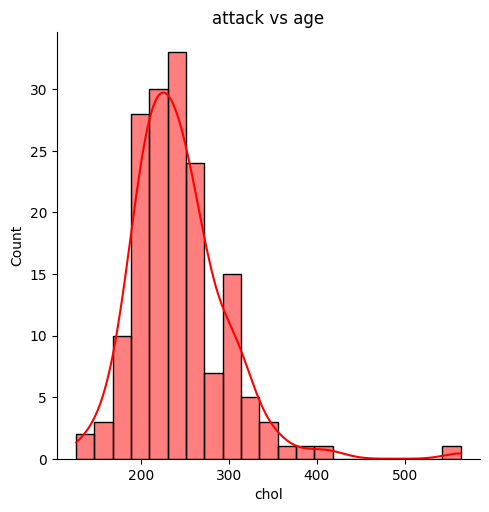

In [27]:
plt.figure(figsize=(10,10))
sns.displot(df[df['output']==0]['chol'] ,color='green',kde= True)
sns.displot(df[df['output']==1]['chol'] ,color='red',kde= True)
plt.title("attack vs age")
plt.show()


In [33]:
y= df.iloc[:,-1].values
x=df.iloc[:,1:-1].values

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [38]:
pred=classifier.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(pred,y_test)

0.868421052631579